<a href="https://colab.research.google.com/github/h679177/ml_project/blob/main/semester_prosjekt_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [ ]:
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [ ]:
%matplotlib inline

In [ ]:
if colab:
    !pip install scikit-learn --upgrade

In [ ]:
# Set the directory in which to store data
NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR

DATA.mkdir(exist_ok=True) # Create the data directory

In [ ]:
students = pd.read_csv('data/student-por.csv', delimiter=';')
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
# Divides results into for pass and fail
students['result']=pd.cut(students['G3'], bins=[-1, 10, 20], labels=[0, 1])
students['result'].unique()

[1, 0]
Categories (2, int64): [0 < 1]

In [ ]:
# Split into data and labels
X = students.drop(columns=['G3', 'result'])
y = students['result']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X_train), len(X_test)

(519, 130)

In [ ]:
# manual solution
wrong = 0
correct = 0
for index, row in X_train.iterrows():
    if row['studytime'] == 1:
      if y_train[index] == 0:
        correct += 1
      else:
        wrong += 1
    else:
      if y_train[index] == 1:
        correct += 1
      else:
        wrong += 1
print(wrong, correct)

187 332


Prediksjon kun 4 på distinction: 237C, 282W.
Prediksjon kun pass/fail: 331C, 188W.

In [ ]:
X_train.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,16.778420,2.489403,2.277457,1.576108,1.901734,0.225434,3.934489,3.198459,3.231214,1.524085,2.287091,3.537572,3.691715,11.248555,11.458574
std,1.237695,1.119925,1.083436,0.764492,0.812533,0.590504,0.962394,1.064121,1.179174,0.972050,1.306520,1.440598,4.679841,2.675838,2.880791
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,9.500000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,18.000000,19.000000


In [ ]:
# drop columns
def drop_columns(df):
    columns_to_drop = ['school', 'sex', 'age', 'nursery', 'romantic', 'paid', 'guardian', 'famsize', 'Pstatus', 'internet', 'G1', 'G2', 'famsup', 'health', 'activities', 'schoolsup']
    existing_columns = [col for col in columns_to_drop if col in df.columns]
    df.drop(existing_columns, axis=1, inplace=True)
    return df

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical
def encode(df):
  le = LabelEncoder()

  columns = ['address', 'higher']
  for col in columns:
    df[col] = le.fit_transform(df[col])

  one_hot_columns = ['Mjob', 'Fjob', 'reason']
  for col in one_hot_columns:
    one_hot_encoded = pd.get_dummies(df[col], prefix=col, dtype=int)
    df = pd.concat([df, one_hot_encoded], axis=1)
    df.drop(columns=[col], inplace=True)

  return df


In [ ]:
def create_new_categories(df):
    # Creation of max parent education
    df['parent_maxEdu'] = np.where(
        df[['Fedu', 'Medu']].max(axis=1) == 0,
        1,
        df[['Fedu', 'Medu']].max(axis=1))
    df.drop(columns=['Fedu', 'Medu'], inplace=True)

    # Creation of parent jobs
    df['parent_teacher'] = df[['Fjob_teacher', 'Mjob_teacher']].max(axis=1)
    df['parent_at_home'] = df[['Fjob_at_home', 'Mjob_at_home']].max(axis=1)
    df.drop(columns=['Fjob_teacher', 'Mjob_teacher', 'Fjob_at_home', 'Mjob_at_home', 'Fjob_health', 'Mjob_health', 'Fjob_other', 'Mjob_other', 'Fjob_services', 'Mjob_services'], inplace=True)

    return df

In [ ]:
def clipping(df):
  df['absences'] = df['absences'].clip(upper=25)
  return df

In [ ]:
def process_dataset(df):
  df = drop_columns(df)
  df = encode(df)
  df = create_new_categories(df)
  df = clipping(df)
  return df

X_train = process_dataset(X_train)
X_test = process_dataset(X_test)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519 entries, 332 to 102
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   address            519 non-null    int64
 1   traveltime         519 non-null    int64
 2   studytime          519 non-null    int64
 3   failures           519 non-null    int64
 4   higher             519 non-null    int64
 5   famrel             519 non-null    int64
 6   freetime           519 non-null    int64
 7   goout              519 non-null    int64
 8   Dalc               519 non-null    int64
 9   Walc               519 non-null    int64
 10  absences           519 non-null    int64
 11  reason_course      519 non-null    int64
 12  reason_home        519 non-null    int64
 13  reason_other       519 non-null    int64
 14  reason_reputation  519 non-null    int64
 15  parent_maxEdu      519 non-null    int64
 16  parent_teacher     519 non-null    int64
 17  parent_at_home     

-0.1516806530011082


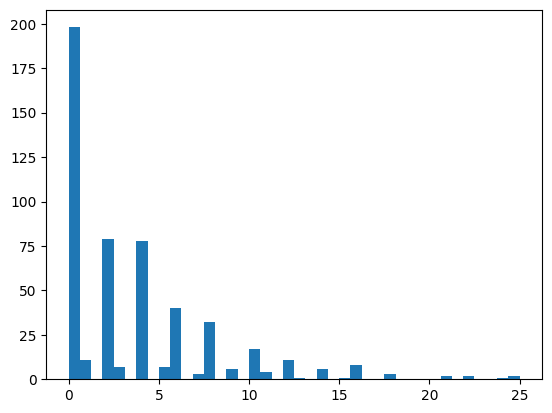

,count
absences,
0,198
2,79
4,78
6,40
8,32
10,17
12,11
1,11
16,8


In [ ]:
var = 'absences'

print(y_train.corr(X_train[var]))

plt.hist(X_train[var], bins=40)
plt.show()

X_train[var].value_counts()

In [ ]:
corr_matrix = X_train.corrwith(y_train)
print(corr_matrix.sort_values(ascending=False))

higher               0.315991
parent_maxEdu        0.244904
studytime            0.182410
parent_teacher       0.167960
address              0.150407
reason_reputation    0.122356
reason_home          0.102438
famrel               0.056766
goout               -0.087281
freetime            -0.106077
reason_course       -0.109968
reason_other        -0.127899
traveltime          -0.135125
absences            -0.151681
Walc                -0.154157
parent_at_home      -0.167915
Dalc                -0.172671
failures            -0.433476
dtype: float64


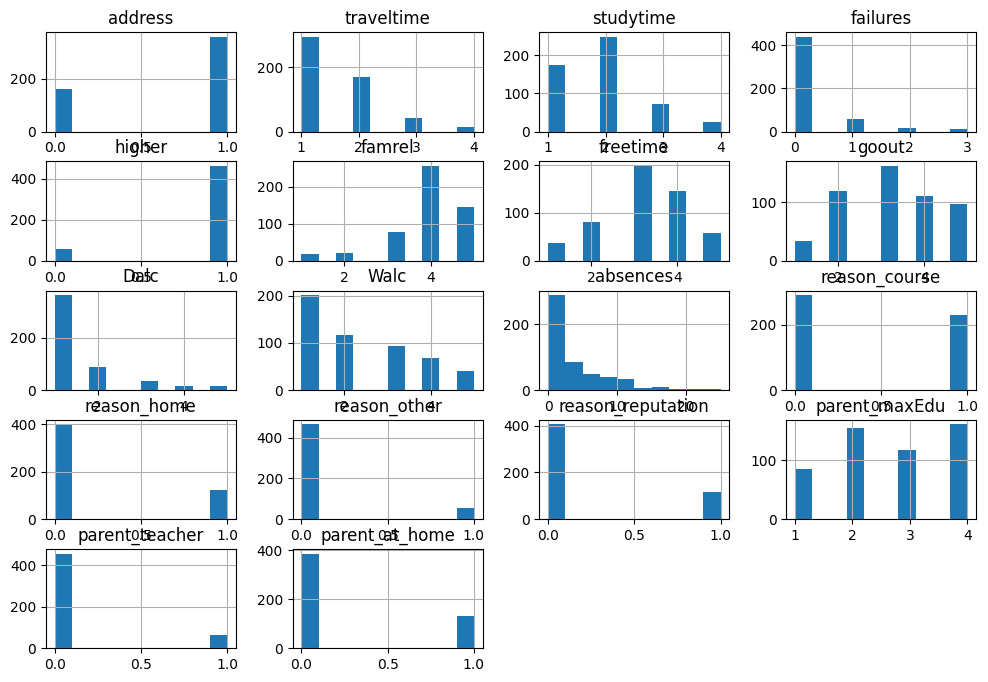

,count
parent_maxEdu,
4,161
2,155
3,118
1,85


In [ ]:
X_train.hist(figsize=(12, 8))
plt.show()
X_train['parent_maxEdu'].value_counts()

In [ ]:
# Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, max_features='log2', min_samples_leaf=2)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=2, n_jobs=-1,
                       random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier, X_train, y_train, scoring='recall', cv=10)
print(scores)
print("%0.2f recall with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(rf_classifier, X_train, y_train, scoring='precision', cv=10)
print(scores)
print("%0.2f precision with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.94444444 0.91666667 0.88888889 0.94444444 0.88571429 0.88571429
 0.88571429 0.74285714 0.97142857 0.94285714]
0.90 recall with a standard deviation of 0.06
[0.79069767 0.78571429 0.84210526 0.94444444 0.73809524 0.86111111
 0.81578947 0.7027027  0.72340426 0.75      ]
0.80 precision with a standard deviation of 0.07


In [ ]:
print("Predictions with standard threshold")
predictions = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, predictions)
print(f"Precision: {precision}")
recall = recall_score(y_test, predictions)
print(f"Recall: {recall}")


final_predictions = rf_classifier.predict(X_test)
probabilities = rf_classifier.predict_proba(X_test)

# Alter the decision threshold
threshold = 0.65
adjusted_predictions = (probabilities[:, 1] >= threshold).astype(int)

accuracy = accuracy_score(y_test, adjusted_predictions)
print(f"Accuracy: {accuracy}")
precision = precision_score(y_test, adjusted_predictions)
print(f"Precision: {precision}")
recall = recall_score(y_test, adjusted_predictions)
print(f"Recall: {recall}")



Predictions with standard threshold
Accuracy: 0.8153846153846154
Precision: 0.8490566037735849
Recall: 0.9183673469387755
Accuracy: 0.7769230769230769
Precision: 0.8791208791208791
Recall: 0.8163265306122449


In [ ]:
from sklearn.metrics import precision_score, recall_score

predictions = rf_classifier.predict(X_train)
confidence = rf_classifier.predict_proba(X_train)

false_positive_indices = [i for i in range(len(predictions)) if (y_train.iloc[i] == 0 and predictions[i] == 1)]

print("Index\tTrue Label\tPredicted Label\tConfidence Score")
for index in false_positive_indices:
    true_label = y_train.iloc[index]  # Use iloc to access by integer position
    predicted_label = predictions[index]
    confidence_score = np.max(confidence[index])
    print(f"{index}\t{true_label}\t\t{predicted_label}\t\t{confidence_score:.4f}")


#accuracy = accuracy_score(y_train, predictions)
#print(f"Accuracy: {accuracy}")
#print(precision_score(y_train, predictions))
#print(recall_score(y_train, predictions))

Index	True Label	Predicted Label	Confidence Score
15	0		1		0.5793
21	0		1		0.5223
25	0		1		0.5918
34	0		1		0.5367
118	0		1		0.5884
148	0		1		0.6264
180	0		1		0.5572
207	0		1		0.6685
232	0		1		0.5950
234	0		1		0.5732
235	0		1		0.5457
247	0		1		0.5730
252	0		1		0.5101
257	0		1		0.6128
305	0		1		0.5190
309	0		1		0.6119
319	0		1		0.7045
339	0		1		0.7508
350	0		1		0.5914
356	0		1		0.5578
384	0		1		0.5112
386	0		1		0.6497
419	0		1		0.7465
428	0		1		0.6562
437	0		1		0.5028
444	0		1		0.5188
446	0		1		0.5365
454	0		1		0.6564
478	0		1		0.5611
497	0		1		0.6521
498	0		1		0.6383
514	0		1		0.5904
515	0		1		0.5843
517	0		1		0.5037


(random_state=42, n_jobs = 1, max_depth=5) gir Accuracy: 0.66, precision: 0.77, recall: 0.66

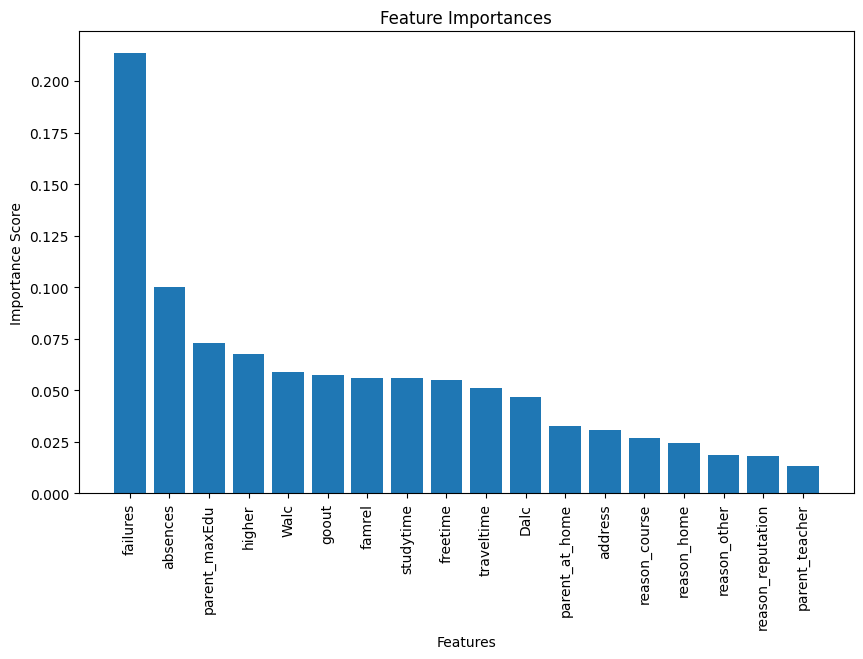

In [ ]:
importances = rf_classifier.feature_importances_

# Assuming feature_names is a list of the feature names
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()

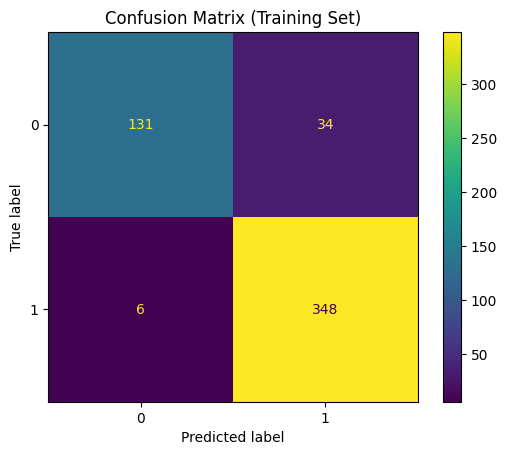

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, predictions)
plt.title('Confusion Matrix (Training Set)')
plt.show()

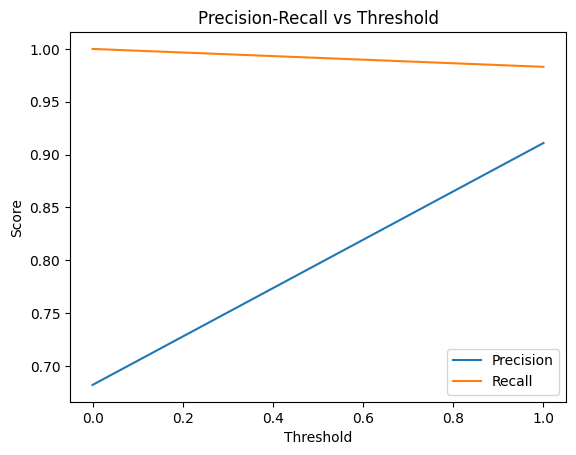

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train, predictions)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 150],
    'max_depth' : [None, 5, 10, 15],
    'min_samples_split' : [2,5],
    'min_samples_leaf' : [1,2],
    'bootstrap' : [True, False],
    'max_features' : ['sqrt', 'log2', None],
}
#grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='precision')
#grid_search.fit(X_train, y_train)

#print("Best parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)

KeyboardInterrupt: 

In [ ]:
#Saving model using pickle
import pickle

pickle.dump(rf_classifier, open('model.pkl', 'wb'))'''

In [ ]:
#Load saved model using pickle, we ended up using joblib, the code is in the last cell
loaded_model = pickle.load(open('model.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)
y_predictions = loaded_model.predict(X_test)
print('result: ', result)

result:  0.8153846153846154
predictions:  [1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 1
 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1

In [ ]:
path = '/content/drive/MyDrive/Colab_Notebooks/'

pickle_out = open(path + 'trained_model.pkl', 'wb')
pickle.dump(rf_classifier, pickle_out)
pickle_out.close


<function BufferedWriter.close()>

In [ ]:
#Save trained model to drive, change path to your desired place to save the model
import joblib
joblib.dump(rf_classifier, path + 'trained_model_joblibvs.pkl')

['/content/drive/MyDrive/Colab_Notebooks/trained_model_joblibvs.pkl']